# **SESSION 1 - Churn Prediction Analysis pt.1**

In [ ]:
# Original One
# https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

<img src="https://raw.githubusercontent.com/webinar-data-science/Session1/main/img/Immagine%202022-11-09%20171948.png" width="600" height="350">

<img src="https://raw.githubusercontent.com/webinar-data-science/Session1/main/img/Immagine%202022-11-09%20171855.png" width="600" height="350">

In [ ]:

# Import relevant libraries for session 1

# Standard libraries for data analysis:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Data preprocessing and visualization

from sklearn.preprocessing import LabelEncoder

# Standard libraries for data visualization

import seaborn as sn


In [ ]:
# Prepare dataset from GitHub
# Import dataset from an url

url= "https://raw.githubusercontent.com/webinar-data-science/Session1/main/customer_churn_data.csv"

dataset = pd.read_csv(url)
 

In [ ]:
# Print first 5 rows of the dataset

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Print all columns names

dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

•	customerID: it's a primary key for each client.

•	Gender: can be Male of Female.

•	SeniorCitizen: it's the seniority of the client, 0 means that a client is less than 40 years old, 1 it's more.

•	Partner: reveals if the client is marriade.

•	Dependents: if a client has a child.

•	Tenure: it's a variable with a range from 0 to 100. It's based on different parameters that measure the life tenure of each person. 

•	PhoneService: it can be 0 or 1, 1 if a client has a phone service contract, 0 is the opposite one.

•	MultipleLines: represents if there are some services options inside the contract.

•	InternetService: identifies wich kind of internet each clients has (like DSL or Fiber Optic).

•	OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, Streaming Movies: they are all variables about each service that can be included inside the contract.

•	Contract: identifies wich kind of contract was made by the client (month to month, one year, two years).

•	PaperlessBilling: identifies if a client has choosen for paper billing or only digital.

•	PaymentMethod: identifies which kind of payment method is used.

•	MonthlyCarges: identifies how much each client pays each mounth, it's an average.

•	TotalCharges: identifies how much a client pays each year.


In [ ]:
# Have a first impression of all variables
dataset.describe(exclude="category")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
# Check wich dtypes every variables has

dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#--------DATA MANIPULATION----------

 <img src="https://raw.githubusercontent.com/webinar-data-science/Session1/main/img/Immagine%202022-11-09%20171623.png" width="600" height="350">

In [ ]:
# Check if there are some Na values

dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
# Print wich and how much unique values has every pandas categorical variable:

a=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for i in a:
    print("Variable: "+ str(i))
    print("     Number of unique values: ",dataset[i].nunique())
    print("     Unique values: ",dataset[i].unique())
    print("------------------------------------------------")

Variable: gender
     Number of unique values:  2
     Unique values:  ['Female' 'Male']
------------------------------------------------
Variable: SeniorCitizen
     Number of unique values:  2
     Unique values:  [0 1]
------------------------------------------------
Variable: Partner
     Number of unique values:  2
     Unique values:  ['Yes' 'No']
------------------------------------------------
Variable: Dependents
     Number of unique values:  2
     Unique values:  ['No' 'Yes']
------------------------------------------------
Variable: PhoneService
     Number of unique values:  2
     Unique values:  ['No' 'Yes']
------------------------------------------------
Variable: MultipleLines
     Number of unique values:  3
     Unique values:  ['No phone service' 'No' 'Yes']
------------------------------------------------
Variable: InternetService
     Number of unique values:  3
     Unique values:  ['DSL' 'Fiber optic' 'No']
------------------------------------------------
Vari

In [ ]:
# Convert Total Charge from obj to float
# error='coerce' convert  invalid parsing to NaN
print("Transform TotalCharges from object type to float type")
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

Transform TotalCharges from object type to float type


In [ ]:
# Check if the conversion was correct, there is a chance to create some Na values
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
# Find the average and fill missing values of each columns programmatically

na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()

for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [ ]:
# Revalidate:
  
dataset.isna().any()  


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
# label Encode Binary data----------------------------------------------------------------

# Create a label encoder object and set the counter
le = LabelEncoder()
le_count=0

# Label Encoding will be used for columns with 2 or less unique values
columns_to_encode=dataset.columns[(dataset.nunique()<=2) & (dataset.dtypes == object) ]
for col in columns_to_encode:
  dataset[col]=le.fit_transform(dataset[col])
  le_count += 1
print('{} columns were label encoded.'.format(le_count))
print(columns_to_encode)


6 columns were label encoded.
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'Churn'],
      dtype='object')


In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1


In [ ]:
#--------------------------EXPLORATORY DATA VISUALIZATION----------------------

 <img src="https://raw.githubusercontent.com/webinar-data-science/Session1/main/img/image.png" width="600" height="350">

In [ ]:
  
#Plot Histogram of numeric Columns--------------------------------------

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

dataset3= dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']]
dataset4 = dataset[['tenure', 'MonthlyCharges', 'TotalCharges']]

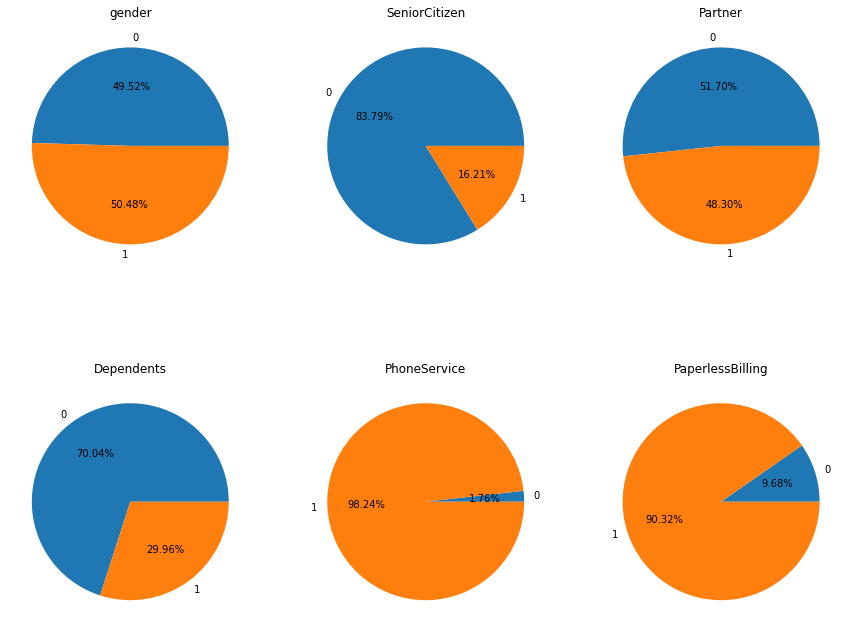

In [ ]:
fig = plt.figure(figsize=(15, 12))
for i in range(dataset3.shape[1]):
    plt.subplot(2, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset3.columns.values[i])

    un=dataset3.gender[dataset[dataset2.columns.values[i]]==0].count()
    du=dataset3.gender[dataset[dataset2.columns.values[i]]==1].count()

    tr=[un, du]

    plt.pie(tr, labels=['0', '1'], autopct='%1.2f%%')

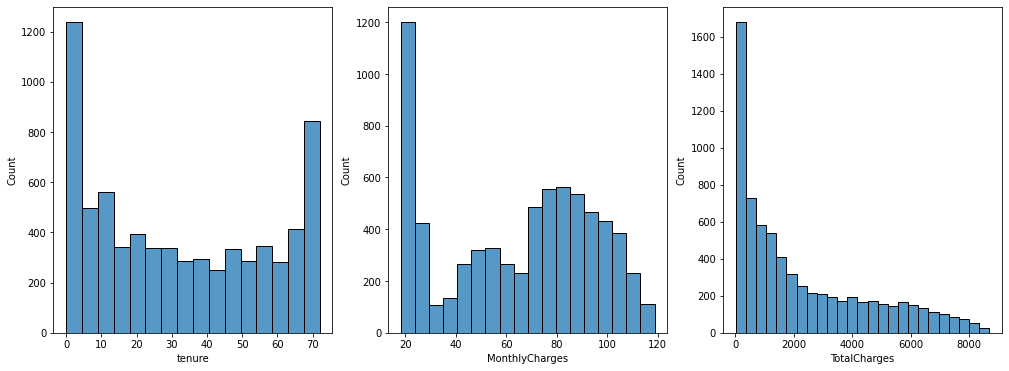

In [ ]:
#No binary histogram
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

sn.histplot(dataset4.tenure, x=dataset4.tenure, multiple="stack", ax=axs[0])
sn.histplot(dataset4.tenure, x=dataset4.MonthlyCharges, multiple="stack", ax=axs[1])
sn.histplot(dataset4.tenure, x=dataset4.TotalCharges, multiple="stack", ax=axs[2])

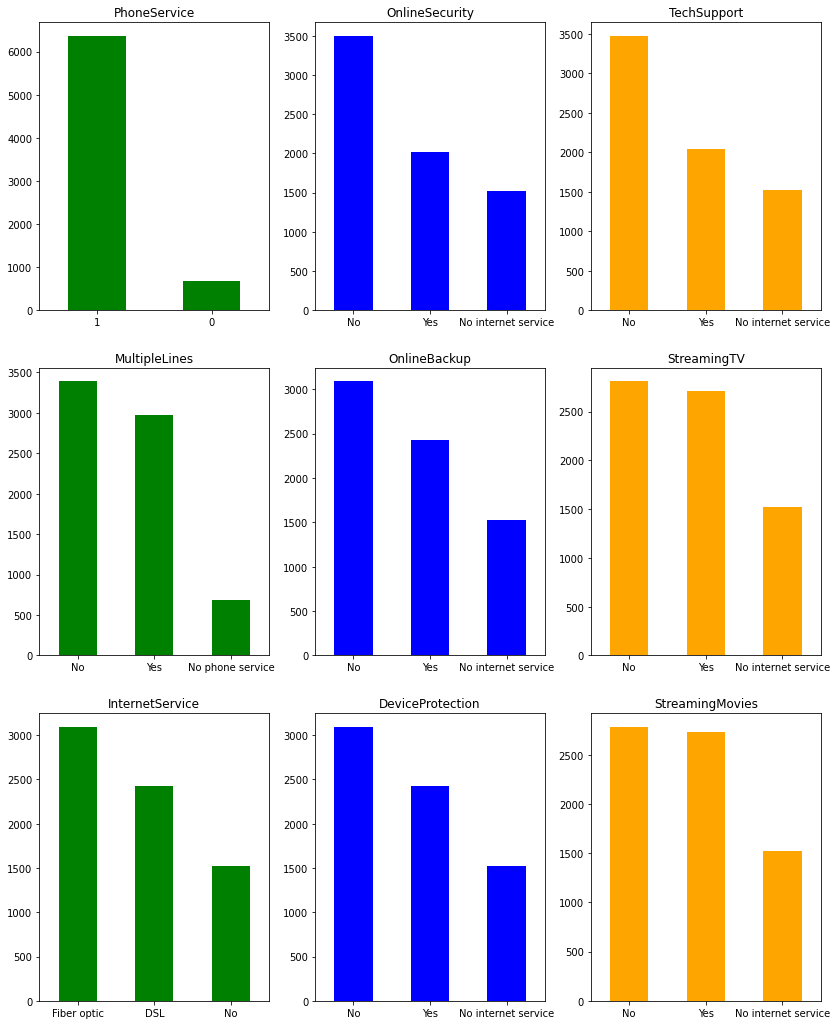

In [ ]:

# Distribution of various 'services' Variables

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (14,18))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='green')
        
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='blue')
        
    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = 'orange')
    ax.set_title(item)

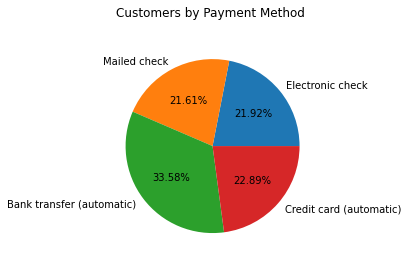

In [ ]:
#(2) Distribution of Payment Method Type
payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

x =payment_method_split['No. of customers'].values
y=dataset['PaymentMethod'].unique()

plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "12", fontfamily = "sans-serif")
plt.pie(x, labels=y, autopct='%1.2f%%');

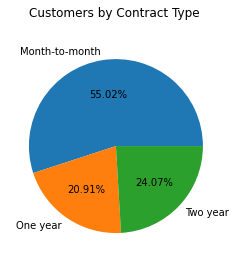

In [ ]:
# Distribution of Contract Type

ab = dataset.Contract=='Month-to-month'
ab1 = dataset.Contract=='One year'
ab2 = dataset.Contract=='Two year'

ac = ab.sum()
ac1 = ab1.sum()
ac2 = ab2.sum()

x = [ac, ac1, ac2]
y = dataset.Contract.unique()

plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "12", fontfamily = "sans-serif")
plt.pie(x, labels=y, autopct='%1.2f%%')
plt.show() 

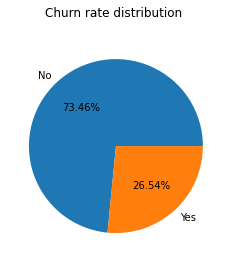

In [ ]:
# Step 9.3: Analyze Churn Rate by Categorical variables:  

# Overall Churn Rate
df5= pd.DataFrame()
df5['Churn']=dataset['Churn']
df5['Churn_label'] = pd.Series(np.where((dataset['Churn'] == 0), "No", "Yes"))

no=df5.Churn[df5['Churn']==0].count()
si=df5.Churn[df5['Churn']==1].count()

x =[no, si]
y=df5.Churn_label.unique()

plt.title('Churn rate distribution \n',horizontalalignment="center", fontstyle = "normal", fontsize = "12", fontfamily = "sans-serif")
plt.pie(x, labels=y, autopct='%1.2f%%');

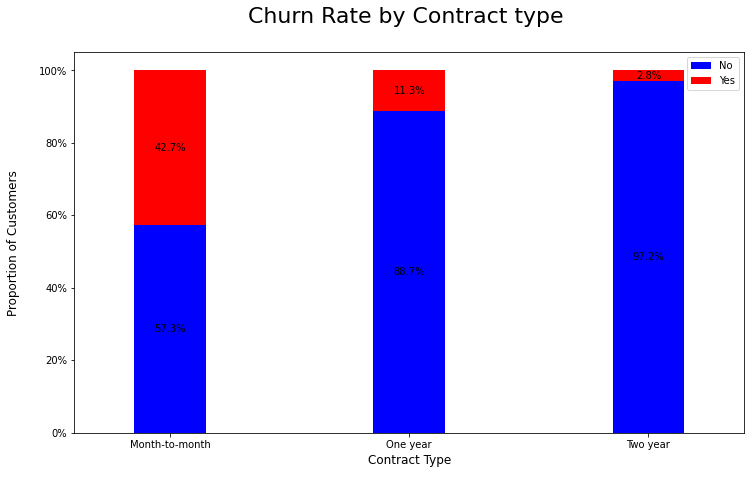

In [ ]:

#(2) Churn Rate by Contract Type 


import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['blue','red']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

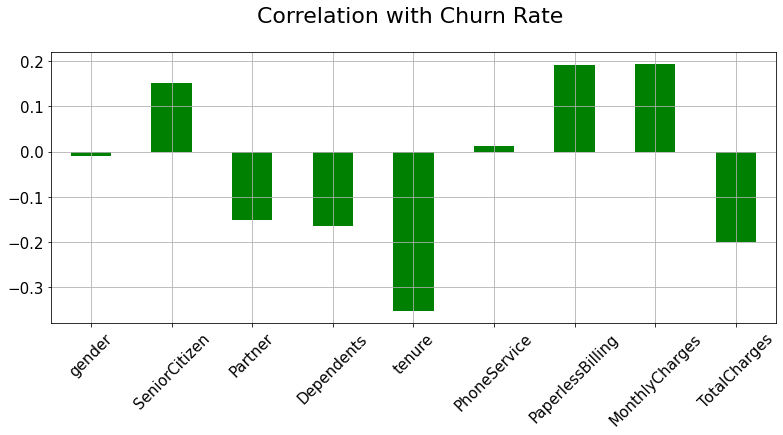

In [ ]:

# Plot positive & negative correlation with Response Variable

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (13, 5), fontsize = 15, color = 'green',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


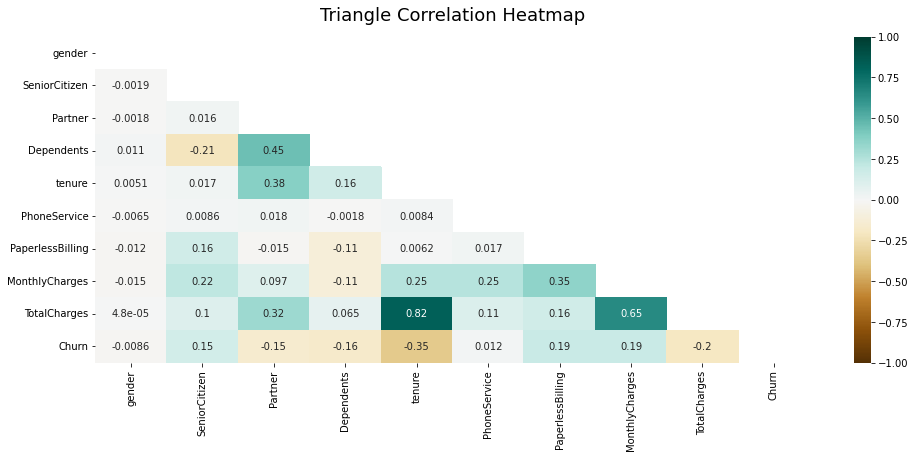

In [ ]:
# CORRELATION MATRIX

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sn.heatmap(dataset.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# **SESSION 2 - Churn Prediction Analysis pt.2**

<img src="https://raw.githubusercontent.com/webinar-data-science/Session2/main/img/MicrosoftTeams-image.png" width="600" height="350">

<img src="https://raw.githubusercontent.com/webinar-data-science/Session2/main/img/MicrosoftTeams-image%20(1).png" width="600" height="350">

<img src="https://raw.githubusercontent.com/webinar-data-science/Session2/main/img/MicrosoftTeams-image%20(2).png" width="600" height="350">

In [ ]:
#----------------SESSION 2-------------------------------------



from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection

from sklearn.metrics import confusion_matrix, accuracy_score 

from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve

from sklearn.model_selection import GridSearchCV

import random


In [ ]:

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','TotalCharges']]

calc_vif(dataset2)

,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269


Text(0.5, 1.0, 'Co-linearity of Monthly Charges and Total Charges \n')

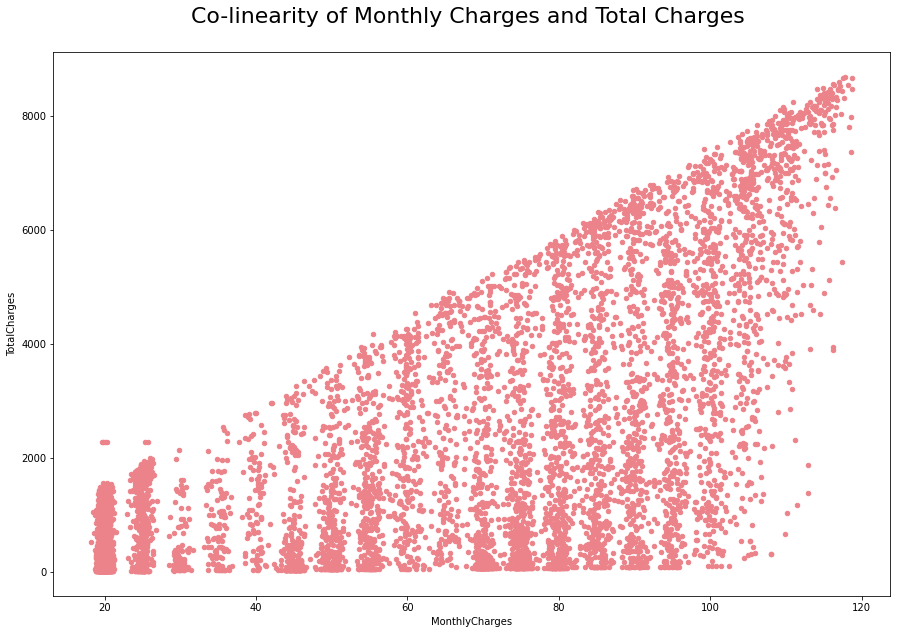

In [ ]:
#Total Charges seem to be colinear with Monthly Charges.

#check colinearity:
    
dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x = 'MonthlyCharges',
                                                              y='TotalCharges', color =  '#ec838a')


plt.title('Co-linearity of Monthly Charges and Total Charges \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

In [ ]:
#dropping TotalCharges:
    
dataset2 = dataset2.drop(columns = "TotalCharges")

#Revalidate Colinearity:

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

calc_vif(dataset2)

,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


In [ ]:
#Applying changes in the main dataset:
    
dataset = dataset.drop(columns = "TotalCharges")  

In [ ]:
#Split dataset into dependent and independent variables

#identify response variable:
    
response = dataset["Churn"]

dataset = dataset.drop(columns="Churn")
colu=dataset.columns

In [ ]:
#Encode Categorical data

#Incase if user_id is an object:
    
identity = dataset["customerID"]

dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy

dataset= pd.get_dummies(dataset)

In [ ]:
#Feature Scaling

sc_X = StandardScaler()
dataset = pd.DataFrame(sc_X.fit_transform(dataset))

In [ ]:
#Generate training and test datasets of dependent and independent variables


X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 39)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 39)
Number transactions y_test dataset:  (1409,)


<img src="https://raw.githubusercontent.com/webinar-data-science/Session2/main/img/MicrosoftTeams-image%20(3).png" width="600" height="350">

In [ ]:
#Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=0, shuffle=True)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.14,1.53,74.76,1.18
2,Random Forest,81.55,1.59,78.74,1.32
1,Decision Tree Classifier,64.94,1.43,72.29,0.98


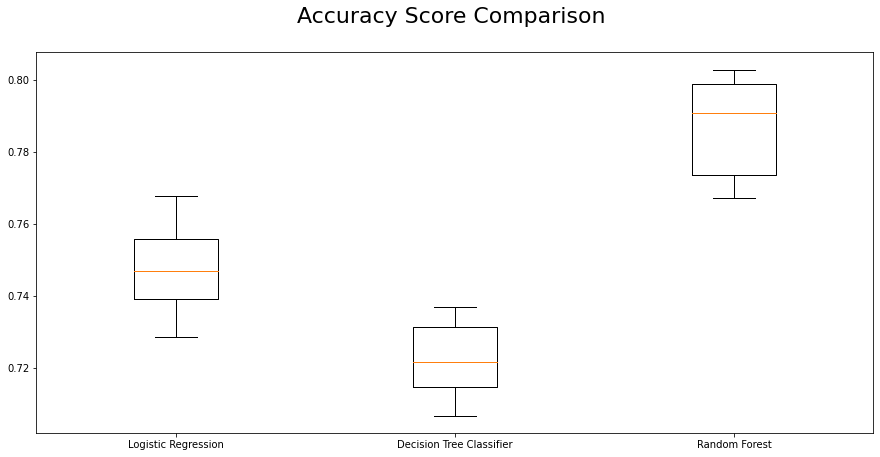

In [ ]:
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

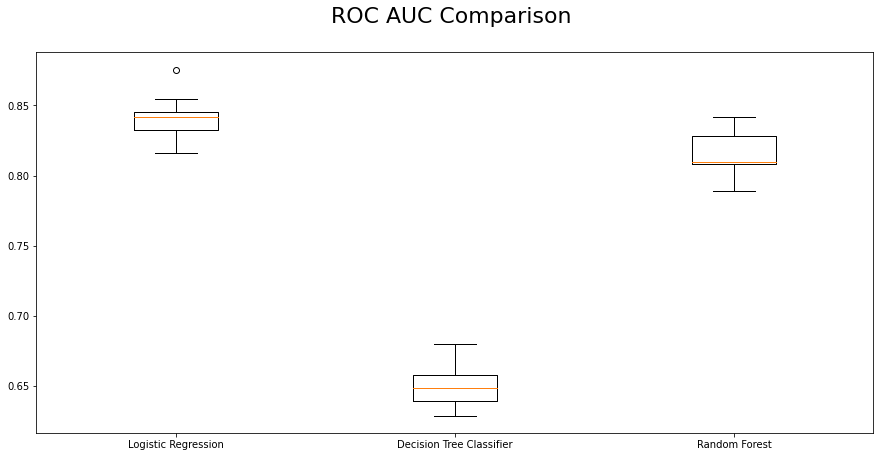

In [ ]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

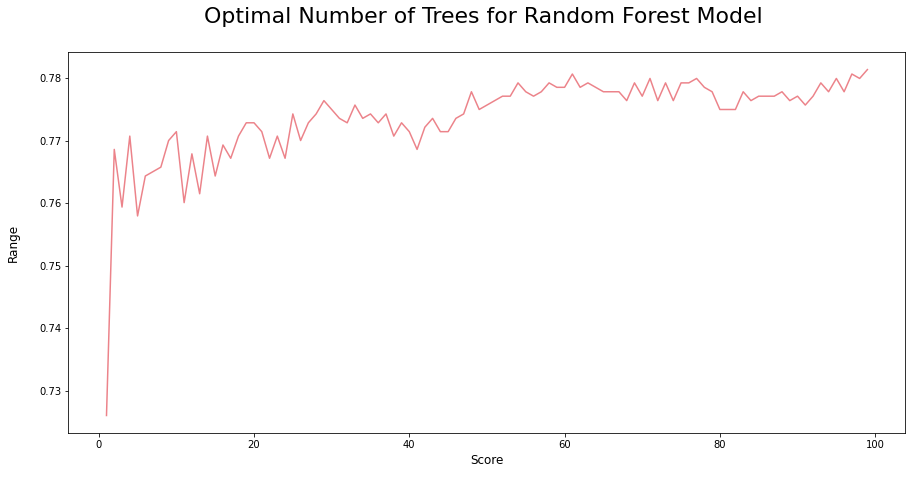

In [ ]:
#Identify optimal number of trees for Random Forest Model:
 
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()
 
 
#Optimal number of decision trees = 98

In [ ]:
#Logistic Regression-----------------

# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

#Decision Tree---------------------------------------------


# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 98, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

In [ ]:
#Step 15.5. Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

#Since we have class imbalance. When we look into the business challenge, 
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.803407   0.652038  0.556150  0.600289  0.573003
2        Random Forest  0.777147   0.611111  0.441176  0.512422  0.467157
1        Decision Tree  0.739532   0.508997  0.529412  0.519004  0.525199


<img src="https://raw.githubusercontent.com/webinar-data-science/Session2/main/img/MicrosoftTeams-image%20(4).png" width="600" height="350">

In [ ]:
#----------------------------------------------------------------------------------------
#-----------------Model Evaluation (Logistic Regression)----------------------
#----------------------------------------------------------------------------------------

In [ ]:
# Fit Logistic Regression on the Training dataset:
    
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.803407   0.652038  0.55615  0.600289  0.573003


Text(0.5, 15.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

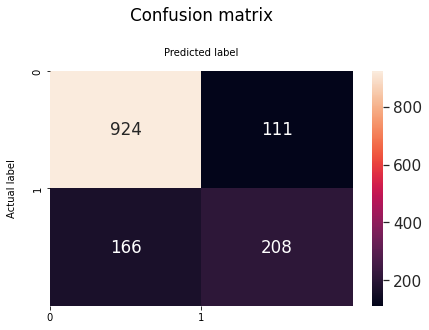

In [ ]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

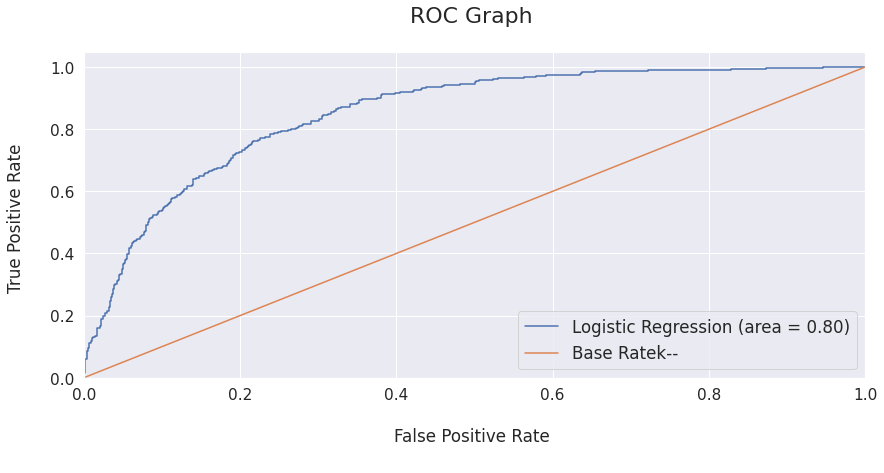

In [ ]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

In [ ]:
#Predict Feature Importance------------------------------------------------------
 

# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(colu, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)
feature_importances=feature_importances.dropna(axis=0).reset_index(drop=True)
feature_importances.sort_values("coef", ascending = False)

,features,coef
12,TechSupport,0.325868
6,PhoneService,0.165887
14,StreamingMovies,0.118733
10,OnlineBackup,0.090533
1,gender,0.078721
17,PaymentMethod,0.053415
5,tenure,0.001946
9,OnlineSecurity,-0.001946
2,SeniorCitizen,-0.008343
0,customerID,-0.041191


<img src="https://raw.githubusercontent.com/webinar-data-science/Session2/main/img/MicrosoftTeams-image%20(5).png" width="600" height="350">

In [ ]:
#----------------------------------------------------------------------------------------
#-----------------Model Improvement (Logistic Regression)----------------------------
#----------------------------------------------------------------------------------------

In [ ]:
#Hyper parameter Tuning
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 4.15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

(0.7190694189796186, {'C': 10, 'penalty': 'l2'})

In [ ]:
#Final Hyper parameter tuning and selection


lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2', C=10)
lr_classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

In [ ]:
#Compare predictions against test set


#Revalidate final results with Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
print (cm)

[[925 110]
 [165 209]]


Test Data Accuracy: 0.8048


<Figure size 2016x1440 with 0 Axes>

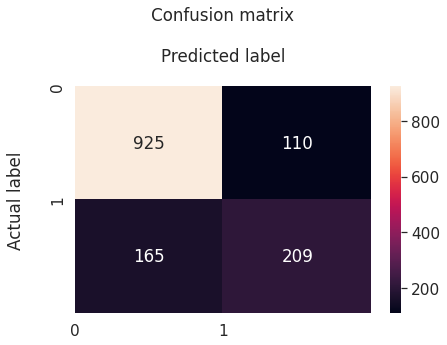

In [ ]:
#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))